In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/ironhack-datalabs/data-ber-10-19/master/module-2_labs/lab-matplotlib-seaborn/your-code/Fitbit2.csv')


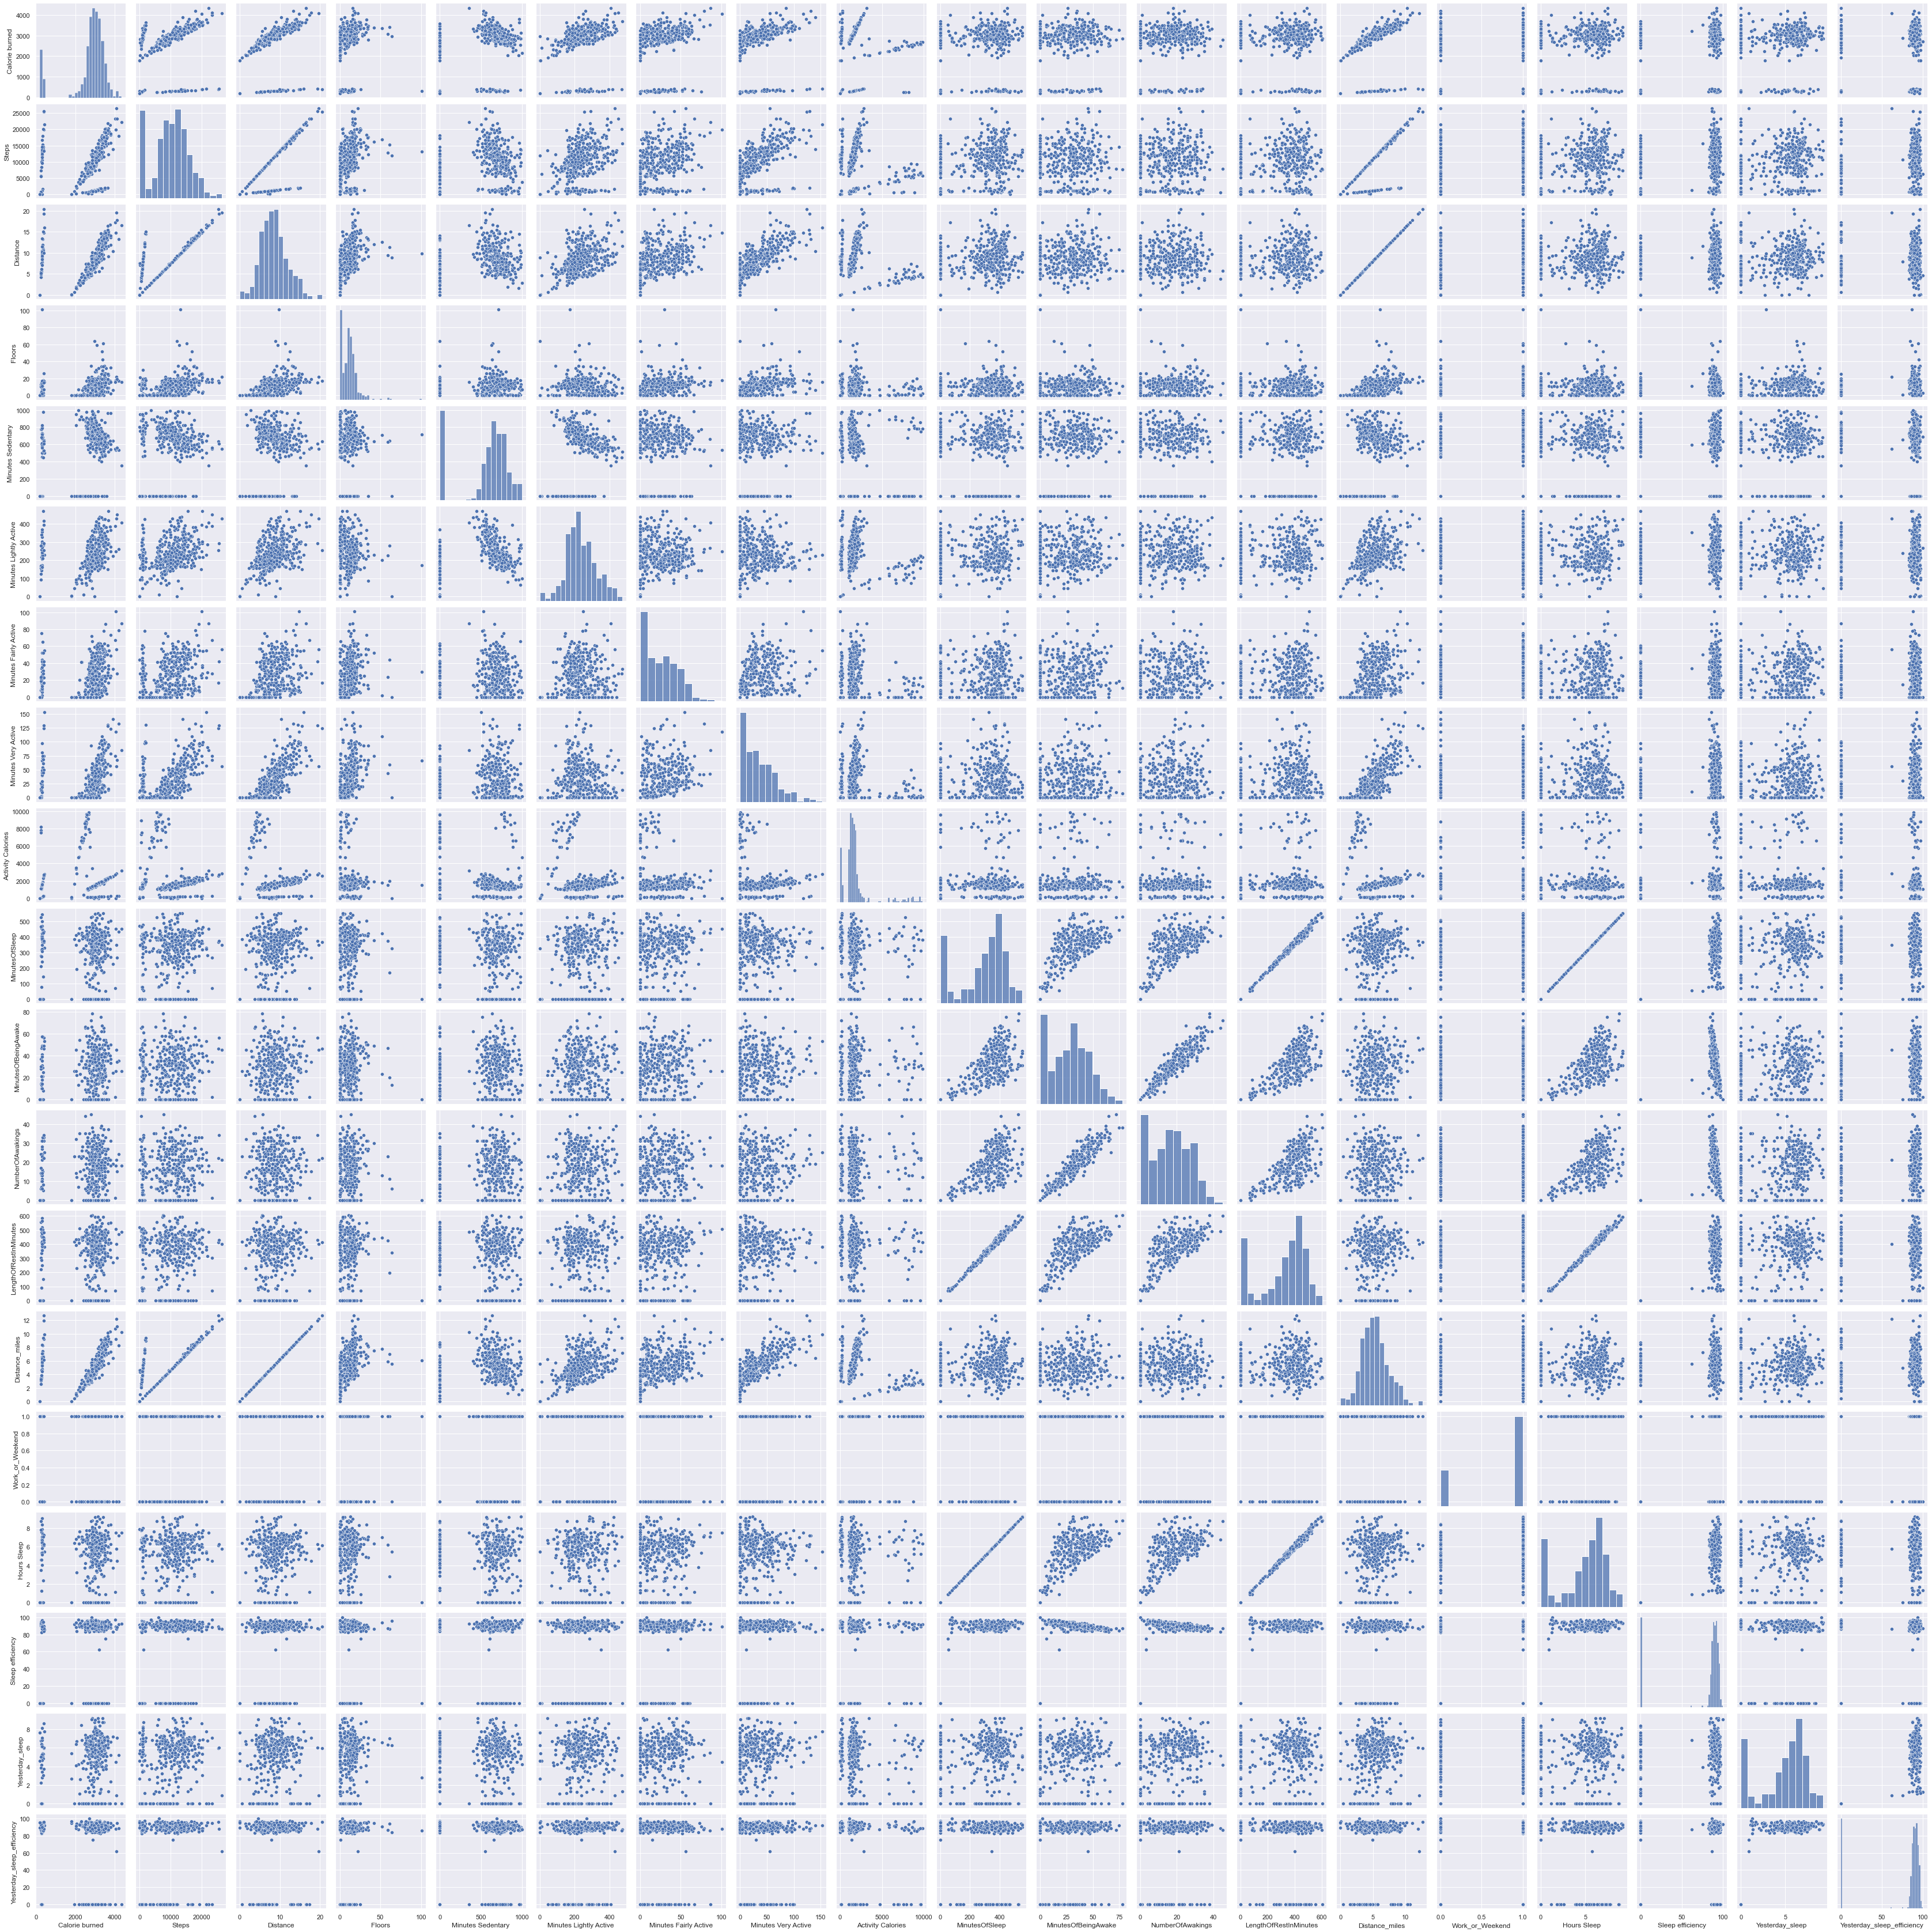

In [60]:
sns.pairplot(df)

In [3]:
df.head()

Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0  2015-05-08            1934    905      0.65       0              1.355   
1  2015-05-09            3631  18925     14.11       4            611.000   
2  2015-05-10            3204  14228     10.57       1            602.000   
3  2015-05-11            2673   6756      5.02       8            749.000   
4  2015-05-12            2495    502      3.73       1            876.000   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                      46                      0                    0   
1                     316                     61                   60   
2                     226                     14                   77   
3                     190                     23                    4   
4                     171                      0                    0   

   Activity Calories  ...  Distance_miles      Days  Days_encoded  \
0               1680  ...        0.403891    Friday           4.0   
1               2248  ...        8.767545  Saturday           5.0   
2               1719  ...        6.567891    Sunday           6.0   
3               9620  ...        3.119282    Monday           0.0   
4               7360  ...        2.317714   Tuesday           1.0   

   Work_or_Weekend  Hours Sleep Sleep efficiency  Yesterday_sleep  \
0                1     6.400000        92.086331         0.000000   
1                0     7.566667        92.464358         6.400000   
2                0     6.450000        88.761468         7.566667   
3                1     5.183333        88.857143         6.450000   
4                1     6.783333        82.892057         5.183333   

   Yesterday_sleep_efficiency  Months  Months_encoded  
0                    0.000000     May               5  
1                   92.086331     May               5  
2                   92.464358     May               5  
3                   88.761468     May               5  
4                   88.857143     May               5  

[5 rows x 24 columns]

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

What makes you wake up and stay awake all night? Reasons behind insomnia

In [5]:
df.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

<AxesSubplot:xlabel='NumberOfAwakings', ylabel='MinutesOfBeingAwake'>

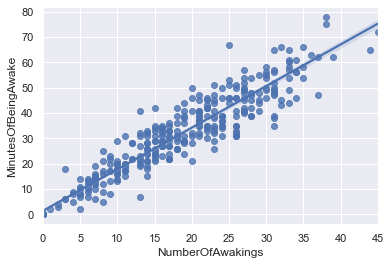

In [6]:
sns.regplot(data=df, x='NumberOfAwakings', y='MinutesOfBeingAwake')

<AxesSubplot:xlabel='NumberOfAwakings'>

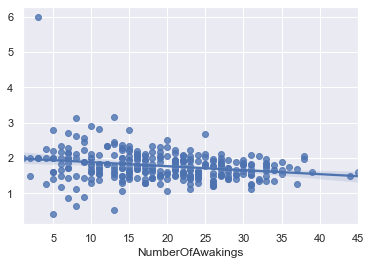

In [7]:
sns.regplot(data=df, x='NumberOfAwakings', y=df.eval('MinutesOfBeingAwake/NumberOfAwakings'))

In [8]:
from statsmodels.formula.api import ols

In [9]:
model=ols('MinutesOfBeingAwake ~ NumberOfAwakings', data=df) #define the ols object and data that is going to be used

In [10]:
model_fit=model.fit() #calculate everything

In [11]:
model_fit.summary() #print the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Wed, 10 Mar 2021   Prob (F-statistic):          1.89e-189
Time:                         20:29:45   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
df.corr().MinutesOfBeingAwake.abs().sort_values()

Activity Calories             0.010859
Days_encoded                  0.013195
Work_or_Weekend               0.038051
Calorie burned                0.041999
Floors                        0.064587
Minutes Lightly Active        0.096107
Minutes Fairly Active         0.104303
Months_encoded                0.112566
Minutes Very Active           0.116559
Steps                         0.124846
Distance_miles                0.130447
Distance                      0.130447
Yesterday_sleep_efficiency    0.131307
Yesterday_sleep               0.160424
Minutes Sedentary             0.200589
Sleep efficiency              0.599178
MinutesOfSleep                0.779595
Hours Sleep                   0.779595
LengthOfRestInMinutes         0.820110
NumberOfAwakings              0.951817
MinutesOfBeingAwake           1.000000
Name: MinutesOfBeingAwake, dtype: float64

In [13]:
df.corr().MinutesOfSleep

Calorie burned                0.011485
Steps                         0.130986
Distance                      0.129442
Floors                        0.069464
Minutes Sedentary             0.204242
Minutes Lightly Active        0.105048
Minutes Fairly Active         0.114950
Minutes Very Active           0.108018
Activity Calories            -0.005804
MinutesOfSleep                1.000000
MinutesOfBeingAwake           0.779595
NumberOfAwakings              0.780512
LengthOfRestInMinutes         0.997184
Distance_miles                0.129442
Days_encoded                 -0.033913
Work_or_Weekend               0.094152
Hours Sleep                   1.000000
Sleep efficiency              0.807964
Yesterday_sleep               0.148113
Yesterday_sleep_efficiency    0.095999
Months_encoded               -0.127980
Name: MinutesOfSleep, dtype: float64

According to the tables above, we can conclude that:
1. Sleep efficiency, MinutesOfSleep, Hours Sleep, LengthOfRestInMinutes and NumberOfAwakings are the column with the highest correlation with the outcome - MinutesOfBeingAwake.
2. At the same time we can see that Hours Sleep is functionally dependant from MinutesOfSleep. Hence, I exclude it from my study

In [14]:
model=ols('MinutesOfBeingAwake ~ NumberOfAwakings + LengthOfRestInMinutes + MinutesOfSleep', data=df) #define the ols object and data that is going to be used

In [15]:
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.951
Model:                             OLS   Adj. R-squared:                  0.950
Method:                  Least Squares   F-statistic:                     2327.
Date:                 Wed, 10 Mar 2021   Prob (F-statistic):          1.39e-236
Time:                         20:29:45   Log-Likelihood:                -1040.1
No. Observations:                  367   AIC:                             2088.
Df Residuals:                      363   BIC:                             2104.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.3022      0.461     -0.655      0.513      -1.209       0.605
NumberOfAwakings          0.6747      0.058     11.628      0.000       0.561       0.789
LengthOfRestInMinutes     0.5297      0.030     17.385      0.000       0.470       0.590
MinutesOfSleep           -0.5262      0.031    -16.977      0.000      -0.587      -0.465
==============================================================================
Omnibus:                      106.901   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.434
Skew:                          -1.251   Prob(JB):                     1.00e-85
Kurtosis:                       7.398   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model=ols('MinutesOfBeingAwake ~ NumberOfAwakings + LengthOfRestInMinutes', data=df) #define the ols object and data that is going to be used
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.911
Model:                             OLS   Adj. R-squared:                  0.911
Method:                  Least Squares   F-statistic:                     1870.
Date:                 Wed, 10 Mar 2021   Prob (F-statistic):          3.25e-192
Time:                         20:29:45   Log-Likelihood:                -1147.3
No. Observations:                  367   AIC:                             2301.
Df Residuals:                      364   BIC:                             2312.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0950      0.617     -0.154      0.878      -1.308       1.118
NumberOfAwakings          1.4616      0.047     31.302      0.000       1.370       1.553
LengthOfRestInMinutes     0.0138      0.003      4.688      0.000       0.008       0.020
==============================================================================
Omnibus:                       17.655   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.592
Skew:                           0.290   Prob(JB):                     1.38e-07
Kurtosis:                       4.315   Cond. No.                         777.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
df['month_name']=pd.to_datetime(df.Date).dt.month_name()

In [18]:
df

Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0    2015-05-08            1934    905      0.65       0              1.355   
1    2015-05-09            3631  18925     14.11       4            611.000   
2    2015-05-10            3204  14228     10.57       1            602.000   
3    2015-05-11            2673   6756      5.02       8            749.000   
4    2015-05-12            2495    502      3.73       1            876.000   
..          ...             ...    ...       ...     ...                ...   
362  2016-05-03            3796  18588     14.13      16            599.000   
363  2016-05-04            3525  16382     12.39      16            684.000   
364  2016-05-05            3649  21913     16.40      19            701.000   
365  2016-05-06            3539  19023     14.79      15            575.000   
366  2016-05-07             304   9526      7.08       2            564.000   

     Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                        46                      0                    0   
1                       316                     61                   60   
2                       226                     14                   77   
3                       190                     23                    4   
4                       171                      0                    0   
..                      ...                    ...                  ...   
362                     275                     49                   79   
363                     333                     10                   55   
364                     287                     29                   90   
365                     298                      8                   85   
366                     370                     13                   10   

     Activity Calories  ...       Days  Days_encoded  Work_or_Weekend  \
0                 1680  ...     Friday           4.0                1   
1                 2248  ...   Saturday           5.0                0   
2                 1719  ...     Sunday           6.0                0   
3                 9620  ...     Monday           0.0                1   
4                 7360  ...    Tuesday           1.0                1   
..                 ...  ...        ...           ...              ...   
362                236  ...    Tuesday           1.0                1   
363               2075  ...  Wednesday           2.0                1   
364               2249  ...   Thursday           3.0                1   
365               2112  ...     Friday           4.0                1   
366               1604  ...   Saturday           5.0                0   

     Hours Sleep  Sleep efficiency Yesterday_sleep  \
0       6.400000         92.086331        0.000000   
1       7.566667         92.464358        6.400000   
2       6.450000         88.761468        7.566667   
3       5.183333         88.857143        6.450000   
4       6.783333         82.892057        5.183333   
..           ...               ...             ...   
362     6.283333         91.951220        5.233333   
363     6.766667         95.081967        6.283333   
364     4.666667         88.888889        6.766667   
365     6.166667         89.805825        4.666667   
366     8.366667         89.165187        6.166667   

     Yesterday_sleep_efficiency  Months  Months_encoded  month_name  
0                      0.000000     May               5         May  
1                     92.086331     May               5         May  
2                     92.464358     May               5         May  
3                     88.761468     May               5         May  
4                     88.857143     May               5         May  
..                          ...     ...             ...         ...  
362                   90.229885     May               5         May  
363                   91.951220     May               5         May  
364  

In [19]:
model=ols('MinutesOfBeingAwake ~ NumberOfAwakings + LengthOfRestInMinutes + month_name', data=df) #define the ols object and data that is going to be used
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.918
Model:                             OLS   Adj. R-squared:                  0.915
Method:                  Least Squares   F-statistic:                     303.3
Date:                 Wed, 10 Mar 2021   Prob (F-statistic):          1.54e-182
Time:                         20:29:45   Log-Likelihood:                -1133.3
No. Observations:                  367   AIC:                             2295.
Df Residuals:                      353   BIC:                             2349.
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.8847      1.171      3.316      0.001       1.581       6.188
month_name[T.August]       -5.0023      1.388     -3.605      0.000      -7.732      -2.273
month_name[T.December]     -4.9944      1.397     -3.575      0.000      -7.742      -2.247
month_name[T.February]     -4.4326      1.402     -3.161      0.002      -7.190      -1.675
month_name[T.January]      -3.7797      1.387     -2.726      0.007      -6.507      -1.053
month_name[T.July]         -1.1668      1.402     -0.832      0.406      -3.924       1.590
month_name[T.June]         -2.3223      1.399     -1.660      0.098      -5.074       0.430
month_name[T.March]        -4.5218      1.396     -3.240      0.001      -7.267      -1.777
month_name[T.May]          -4.5676      1.389     -3.289      0.001      -7.299      -1.836
month_name[T.November]     -3.6360      1.406     -2.587      0.010      -6.400      -0.872
month_name[T.October]      -3.7491      1.404     -2.670      0.008      -6.511      -0.987
month_name[T.September]    -4.4726      1.403     -3.189      0.002      -7.231      -1.714
NumberOfAwakings            1.4814      0.047     31.703      0.000       1.390       1.573
LengthOfRestInMinutes       0.0115      0.003      3.813      0.000       0.006       0.017
==============================================================================
Omnibus:                        9.889   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               12.974
Skew:                           0.239   Prob(JB):                      0.00152
Kurtosis:                       3.787   Cond. No.                     4.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
df.month_name.unique()

array(['May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'January', 'February', 'March', 'April'],
      dtype=object)

$MinutesOfBeingAwake = 3.8847 + C*month + 1.4814*NumberOfAwakings+0.0115*LengthOfRestInMinutes$

In [21]:
3.8847-5.0023*1+1.4814*3+10*0.0115

3.4416

In [22]:
y_pred=model_fit.predict()

In [23]:
df['ypred']=y_pred

<AxesSubplot:xlabel='MinutesOfBeingAwake', ylabel='ypred'>

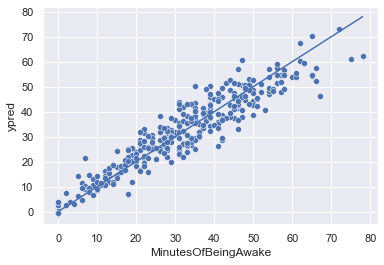

In [24]:
sns.scatterplot(data=df, x='MinutesOfBeingAwake', y='ypred')
sns.lineplot(data=df, x='MinutesOfBeingAwake', y='MinutesOfBeingAwake')

In [25]:
model_fit.resid.mean()

-3.433296033182836e-12

<AxesSubplot:>

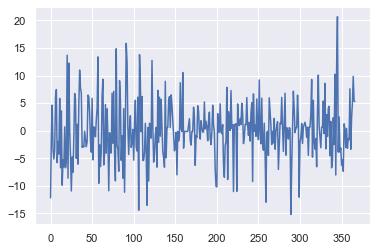

In [26]:
model_fit.resid.plot()

<AxesSubplot:>

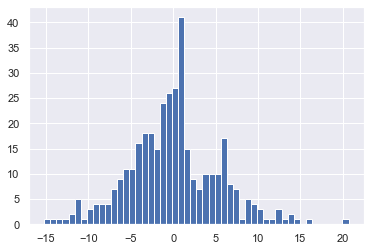

In [27]:
model_fit.resid.hist(bins=50)

/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

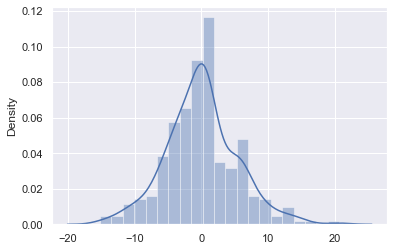

In [28]:
sns.distplot(model_fit.resid)

In [29]:
from statsmodels.api import OLS
from statsmodels.formula.api import ols

In [30]:
#ols
#ols('y ~ X', data).fit()
#OLS
#OLS(y, X).fit()

In [31]:
OLS(df.MinutesOfBeingAwake, df._get_numeric_data().drop('MinutesOfBeingAwake', axis=1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared (uncentered):                   0.987
Model:                             OLS   Adj. R-squared (uncentered):              0.986
Method:                  Least Squares   F-statistic:                              1344.
Date:                 Wed, 10 Mar 2021   Prob (F-statistic):                   2.49e-312
Time:                         20:29:46   Log-Likelihood:                         -1019.6
No. Observations:                  367   AIC:                                      2077.
Df Residuals:                      348   BIC:                                      2151.
Df Model:                           19                                                  
Covariance Type:             nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Calorie burned                -0.0002      0.000     -0.684      0.494      -0.001       0.000
Steps                       7.387e-05   6.15e-05      1.202      0.230    -4.7e-05       0.000
Distance                       0.2618      0.122      2.143      0.033       0.022       0.502
Floors                        -0.0540      0.024     -2.217      0.027      -0.102      -0.006
Minutes Sedentary              0.0008      0.001      1.103      0.271      -0.001       0.002
Minutes Lightly Active        -0.0099      0.004     -2.486      0.013      -0.018      -0.002
Minutes Fairly Active         -0.0260      0.012     -2.168      0.031      -0.050      -0.002
Minutes Very Active           -0.0376      0.014     -2.663      0.008      -0.065      -0.010
Activity Calories          -9.769e-05      0.000     -0.936      0.350      -0.000       0.000
MinutesOfSleep                -0.5376      0.032    -16.543      0.000      -0.602      -0.474
NumberOfAwakings               0.1236      0.219      0.564      0.573      -0.308       0.555
LengthOfRestInMinutes          0.5378      0.032     16.595      0.000       0.474       0.602
Distance_miles                 0.1627      0.076      2.143      0.033       0.013       0.312
Days_encoded                   0.4293      0.144      2.976      0.003       0.146       0.713
Work_or_Weekend                1.9231      0.669      2.874      0.004       0.607       3.239
Hours Sleep                   -0.0090      0.001    -16.543      0.000      -0.010      -0.008
Sleep efficiency              -0.0141      0.011     -1.299      0.195      -0.036       0.007
Yesterday_sleep               -0.2162      0.142     -1.522      0.129      -0.496       0.063
Yesterday_sleep_efficiency     0.0056      0.011      0.529      0.597      -0.015       0.026
Months_encoded                -0.0891      0.060     -1.480      0.140      -0.208       0.029
ypred                          0.3693      0.152      2.423      0.016       0.069       0.669
==============================================================================
Omnibus:                      115.903   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              520.134
Skew:                          -1.288   Prob(JB):                    1.13e-113
Kurtosis:                       8.233   Cond. No.                     9.05e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenva

In [32]:
#numpy
#scipy
#statsmodels
#scikit-learn
#any other stats related model

In [33]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(df._get_numeric_data().drop('MinutesOfBeingAwake', axis=1), df.MinutesOfBeingAwake)
model.coef_

array([-9.86305659e-05,  7.14313919e-05, -6.40013061e+05, -5.23064948e-02,
        9.36055949e-04, -9.09969784e-03, -2.61725706e-02, -3.71652877e-02,
       -5.70472174e-05, -9.12431243e+08,  1.47745422e-01,  5.35248469e-01,
        1.03000209e+06,  5.23345501e-01,  2.32636907e+00,  5.47458745e+10,
       -1.22753655e-02, -2.27767731e-01,  7.76605157e-03, -6.76272146e-02,
        3.55596188e-01])

In [34]:
model.intercept_

-1.5162163537472075

# Let's build a proper OLS model by cleaning the dataset first and testing all the assumptions and trying to make the best model possible

In [35]:
df=pd.read_csv('https://raw.githubusercontent.com/ironhack-datalabs/data-ber-10-19/master/module-2_labs/lab-matplotlib-seaborn/your-code/Fitbit2.csv')

In [36]:
df.head()

Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0  2015-05-08            1934    905      0.65       0              1.355   
1  2015-05-09            3631  18925     14.11       4            611.000   
2  2015-05-10            3204  14228     10.57       1            602.000   
3  2015-05-11            2673   6756      5.02       8            749.000   
4  2015-05-12            2495    502      3.73       1            876.000   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                      46                      0                    0   
1                     316                     61                   60   
2                     226                     14                   77   
3                     190                     23                    4   
4                     171                      0                    0   

   Activity Calories  ...  Distance_miles      Days  Days_encoded  \
0               1680  ...        0.403891    Friday           4.0   
1               2248  ...        8.767545  Saturday           5.0   
2               1719  ...        6.567891    Sunday           6.0   
3               9620  ...        3.119282    Monday           0.0   
4               7360  ...        2.317714   Tuesday           1.0   

   Work_or_Weekend  Hours Sleep Sleep efficiency  Yesterday_sleep  \
0                1     6.400000        92.086331         0.000000   
1                0     7.566667        92.464358         6.400000   
2                0     6.450000        88.761468         7.566667   
3                1     5.183333        88.857143         6.450000   
4                1     6.783333        82.892057         5.183333   

   Yesterday_sleep_efficiency  Months  Months_encoded  
0                    0.000000     May               5  
1                   92.086331     May               5  
2                   92.464358     May               5  
3                   88.761468     May               5  
4                   88.857143     May               5  

[5 rows x 24 columns]

In [37]:
df.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

In [38]:
df.drop('Date', axis=1, inplace=True)

In [39]:
df.drop(['Days_encoded','Months_encoded'], axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Calorie burned              367 non-null    int64  
 1   Steps                       367 non-null    int64  
 2   Distance                    367 non-null    float64
 3   Floors                      367 non-null    int64  
 4   Minutes Sedentary           367 non-null    float64
 5   Minutes Lightly Active      367 non-null    int64  
 6   Minutes Fairly Active       367 non-null    int64  
 7   Minutes Very Active         367 non-null    int64  
 8   Activity Calories           367 non-null    int64  
 9   MinutesOfSleep              367 non-null    int64  
 10  MinutesOfBeingAwake         367 non-null    int64  
 11  NumberOfAwakings            367 non-null    int64  
 12  LengthOfRestInMinutes       367 non-null    int64  
 13  Distance_miles              367 non

In [41]:
df.nunique()

Calorie burned                326
Steps                         360
Distance                      318
Floors                         40
Minutes Sedentary             282
Minutes Lightly Active        210
Minutes Fairly Active          74
Minutes Very Active           103
Activity Calories             325
MinutesOfSleep                206
MinutesOfBeingAwake            68
NumberOfAwakings               42
LengthOfRestInMinutes         206
Distance_miles                318
Days                            7
Work_or_Weekend                 2
Hours Sleep                   206
Sleep efficiency              293
Yesterday_sleep               205
Yesterday_sleep_efficiency    292
Months                         12
dtype: int64

In [42]:
df1=pd.get_dummies(data=df, columns=['Days','Months'], drop_first=True)

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Calorie burned              367 non-null    int64  
 1   Steps                       367 non-null    int64  
 2   Distance                    367 non-null    float64
 3   Floors                      367 non-null    int64  
 4   Minutes Sedentary           367 non-null    float64
 5   Minutes Lightly Active      367 non-null    int64  
 6   Minutes Fairly Active       367 non-null    int64  
 7   Minutes Very Active         367 non-null    int64  
 8   Activity Calories           367 non-null    int64  
 9   MinutesOfSleep              367 non-null    int64  
 10  MinutesOfBeingAwake         367 non-null    int64  
 11  NumberOfAwakings            367 non-null    int64  
 12  LengthOfRestInMinutes       367 non-null    int64  
 13  Distance_miles              367 non

In [44]:
from statsmodels.api import add_constant

In [45]:
add_constant(df1) ; # adds a column with constant

In [46]:
X, y = add_constant(df1).drop('MinutesOfBeingAwake', axis=1), df1.MinutesOfBeingAwake # features, target

In [55]:
model_fit=OLS(y, X).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.962
Model:                             OLS   Adj. R-squared:                  0.958
Method:                  Least Squares   F-statistic:                     263.1
Date:                 Wed, 10 Mar 2021   Prob (F-statistic):          2.51e-216
Time:                         20:30:00   Log-Likelihood:                -992.58
No. Observations:                  367   AIC:                             2051.
Df Residuals:                      334   BIC:                             2180.
Df Model:                           32                                         
Covariance Type:             nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.3420      1.155      1.162      0.246      -0.929       3.613
Calorie burned                -0.0001      0.000     -0.440      0.660      -0.001       0.000
Steps                       4.559e-05   5.89e-05      0.774      0.440   -7.04e-05       0.000
Distance                       0.2467      0.120      2.057      0.040       0.011       0.483
Floors                         0.0050      0.025      0.197      0.844      -0.045       0.055
Minutes Sedentary              0.0012      0.001      1.577      0.116      -0.000       0.003
Minutes Lightly Active        -0.0062      0.004     -1.563      0.119      -0.014       0.002
Minutes Fairly Active         -0.0291      0.012     -2.355      0.019      -0.053      -0.005
Minutes Very Active           -0.0334      0.014     -2.401      0.017      -0.061      -0.006
Activity Calories           8.226e-06      0.000      0.074      0.941      -0.000       0.000
MinutesOfSleep                -0.6276      0.033    -18.825      0.000      -0.693      -0.562
NumberOfAwakings               0.5014      0.062      8.103      0.000       0.380       0.623
LengthOfRestInMinutes          0.6345      0.033     19.228      0.000       0.570       0.699
Distance_miles                 0.1533      0.075      2.057      0.040       0.007       0.300
Work_or_Weekend                0.8787      0.611      1.438      0.151      -0.323       2.081
Hours Sleep                   -0.0105      0.001    -18.825      0.000      -0.012      -0.009
Sleep efficiency              -0.0160      0.011     -1.514      0.131      -0.037       0.005
Yesterday_sleep               -0.0663      0.139     -0.476      0.635      -0.340       0.208
Yesterday_sleep_efficiency     0.0043      0.010      0.409      0.683      -0.016       0.025
Days_Monday                   -1.7715      0.761     -2.328      0.021      -3.268      -0.275
Days_Saturday                 -0.0631      0.596     -0.106      0.916      -1.235       1.108
Days_Sunday                    0.5265      0.555      0.948      0.344      -0.566       1.619
Days_Thursday                  0.5056      0.757      0.668      0.504      -0.983       1.994
Days_Tuesday                  -1.0051      0.760     -1.323      0.187      -2.499       0.489
Days_Wednesday                -0.2430      0.752     -0.323      0.747      -1.723       1.237
Months_August                 -5.1501      1.019     -5.053      0.000      -7.155      -3.145
Months_December               -1.8868      1.052     -1.793      0.074      -3.956       0.183
Months_February               -1.3168      1.069     -1.231      0.219      -3.420       0.787
Months_January                -0.7689      1.042     -0.738      0.461      -2.818       1.280
Months_July                   -4

In [48]:
columns_to_drop=['Calorie burned','Steps','Floors','Minutes Sedentary','Minutes Lightly Active','Activity Calories','MinutesOfSleep',
                'Work_or_Weekend','Sleep efficiency','Yesterday_sleep','Yesterday_sleep_efficiency','Days_Saturday','Days_Tuesday',
                'Days_Monday','Days_Sunday','Days_Wednesday','Months_February','Months_March','Months_October','Months_November',
                'Months_January','Months_December']
model_fit=OLS(y, X.drop(columns_to_drop, axis=1)).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.960
Model:                             OLS   Adj. R-squared:                  0.958
Method:                  Least Squares   F-statistic:                     700.4
Date:                 Wed, 10 Mar 2021   Prob (F-statistic):          2.96e-238
Time:                         20:29:47   Log-Likelihood:                -1003.1
No. Observations:                  367   AIC:                             2032.
Df Residuals:                      354   BIC:                             2083.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.6307      0.680     -0.928      0.354      -1.967       0.706
Distance                  0.1931      0.066      2.905      0.004       0.062       0.324
Minutes Fairly Active    -0.0274      0.011     -2.550      0.011      -0.048      -0.006
Minutes Very Active      -0.0222      0.010     -2.173      0.030      -0.042      -0.002
NumberOfAwakings          0.4975      0.060      8.258      0.000       0.379       0.616
LengthOfRestInMinutes     0.6393      0.032     19.937      0.000       0.576       0.702
Distance_miles            0.1200      0.041      2.905      0.004       0.039       0.201
Hours Sleep             -38.0919      1.942    -19.617      0.000     -41.911     -34.273
Days_Thursday             1.2104      0.578      2.092      0.037       0.073       2.348
Months_August            -4.1927      0.754     -5.559      0.000      -5.676      -2.709
Months_July              -3.6013      0.817     -4.406      0.000      -5.209      -1.994
Months_June              -3.7646      0.811     -4.641      0.000      -5.360      -2.169
Months_May               -2.8804      0.757     -3.807      0.000      -4.368      -1.393
Months_September         -2.2903      0.752     -3.045      0.003      -3.770      -0.811
==============================================================================
Omnibus:                      148.779   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1084.257
Skew:                          -1.523   Prob(JB):                    3.60e-236
Kurtosis:                      10.850   Cond. No.                     2.10e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
import Assumptions

In [59]:
tester=Assumptions.Assumption_Tester_OLS(X.drop(columns_to_drop+['const'], axis=1), y)

Fitting linear regression

R^2: 0.9595820804104631 

Coefficients
-------------------------------------
Intercept: -0.6307074125454193
Distance: 0.19
Minutes Fairly Active: -0.03
Minutes Very Active: -0.02
NumberOfAwakings: 0.5
LengthOfRestInMinutes: 0.64
Distance_miles: 0.12
Hours Sleep: -38.09
Days_Thursday: 1.21
Months_August: -4.19
Months_July: -3.6
Months_June: -3.76
Months_May: -2.88
Months_September: -2.29

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


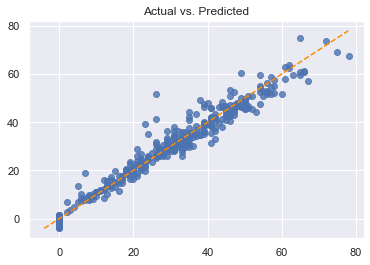

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with MinutesOfBeingAwake


Distance                 0.130447
Minutes Fairly Active    0.104303
Minutes Very Active      0.116559
Distance_miles           0.130447
Name: MinutesOfBeingAwake, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with MinutesOfBeingAwake


NumberOfAwakings         0.951817
LengthOfRestInMinutes    0.820110
Hours Sleep              0.779595
Name: MinutesOfBeingAwake, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


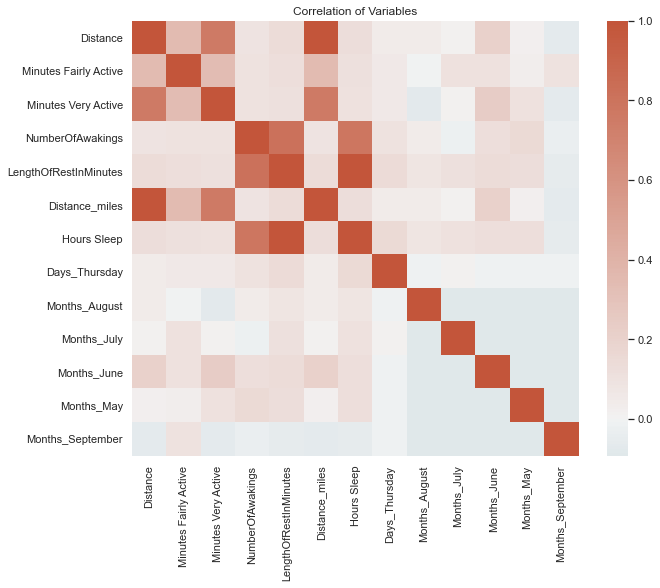

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Distance: inf
Distance_miles: inf
LengthOfRestInMinutes: 3457.2915224393128
Hours Sleep: 2873.0745294724143
NumberOfAwakings: 34.751045561726784
Minutes Very Active: 5.237675467695652
Minutes Fairly Active: 3.184237398065102
Months_July: 1.4352771721212654
Months_June: 1.3734567382293248
Months_May: 1.2275022122832915
Months_August: 1.2274788881817529
Days_Thursday: 1.2100402180922964
Months_September: 1.1588185295160898

5 cases of possible multicollinearity
4 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive

/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


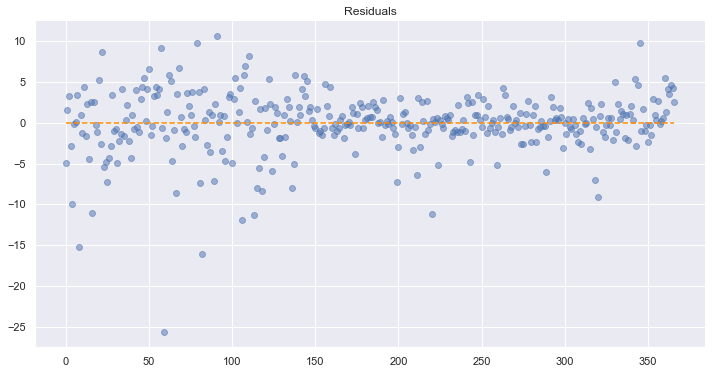

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 130.55614132624598,
 'pvalue for LM': 4.772879669967934e-22,
 'F stats': 16.334896026617905,
 'pvalue for Fstats': 1.2292977073861904e-27}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 7.024435582660903e-21
Residuals are not normally distributed


/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


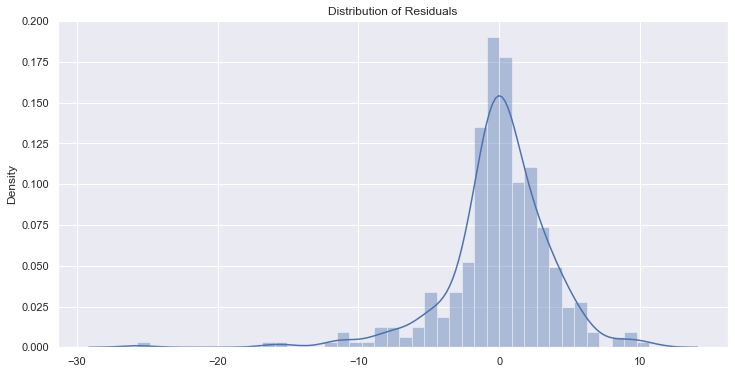


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


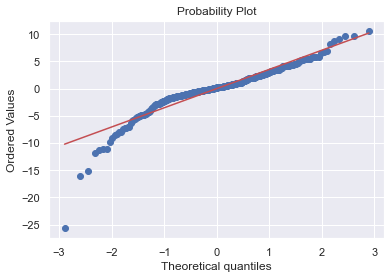


In your dataset you quite fat tails. You have 0.019 potential outliers (7 rows)


{'Satisfied': ['Autocorrelation'],
 'Potentially': ['Linearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Multicollinearity', 'Normality']}

In [51]:
tester.run_all()

Fitting linear regression

R^2: 0.9142000998785699 

Coefficients
-------------------------------------
Intercept: -1.646898421044579
Distance: 0.35
Minutes Fairly Active: -0.01
Minutes Very Active: -0.02
NumberOfAwakings: 1.54
Hours Sleep: 0.54
Days_Thursday: 0.31
Months_August: -1.62
Months_July: 2.76
Months_June: 1.11
Months_May: -0.83
Months_September: -0.69

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


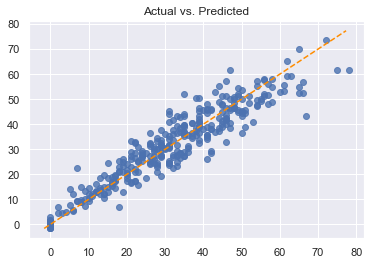

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with MinutesOfBeingAwake


Distance                 0.130447
Minutes Fairly Active    0.104303
Minutes Very Active      0.116559
Name: MinutesOfBeingAwake, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with MinutesOfBeingAwake


NumberOfAwakings    0.951817
Hours Sleep         0.779595
Name: MinutesOfBeingAwake, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


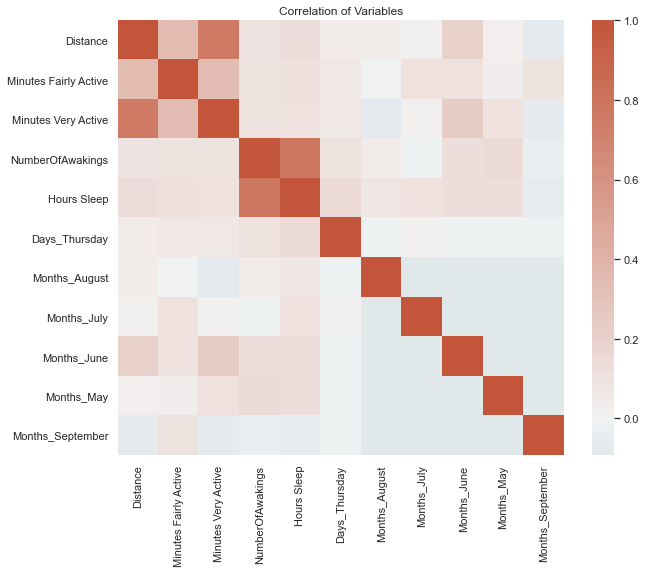

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Hours Sleep: 11.851355838116616
Distance: 9.883699034441257
NumberOfAwakings: 8.699055440228282
Minutes Very Active: 5.226579566162454
Minutes Fairly Active: 3.1667887285976652
Months_June: 1.2468759635602884
Months_July: 1.2199866380027673
Months_May: 1.2065424543699363
Days_Thursday: 1.2021747027415013
Months_August: 1.1912393716192866
Months_September: 1.1478586222728446

1 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocor

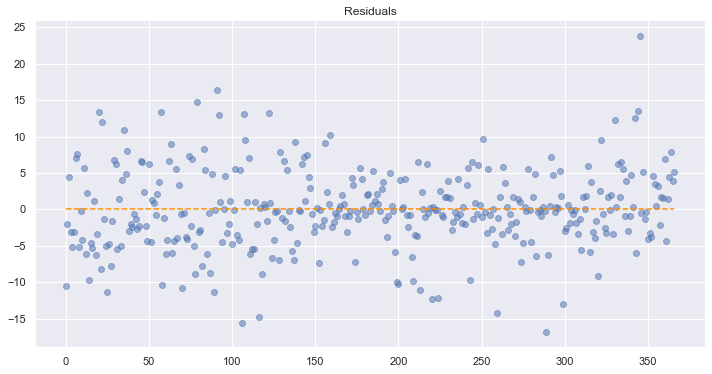

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 122.04682035805634,
 'pvalue for LM': 1.9434467993936227e-21,
 'F stats': 16.125036299507762,
 'pvalue for Fstats': 1.1343908891768288e-25}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 1.9891969698501944e-06
Residuals are not normally distributed


/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


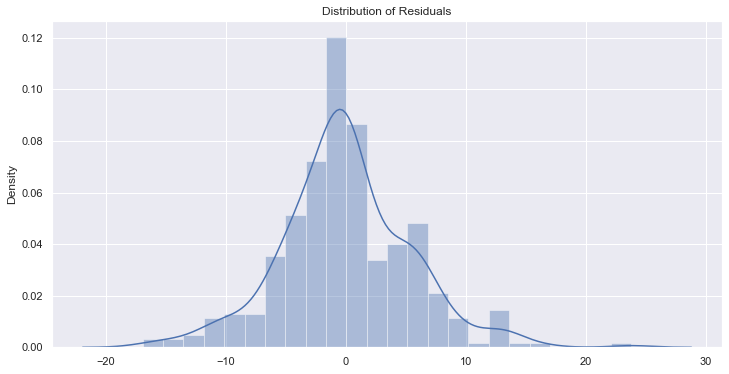


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


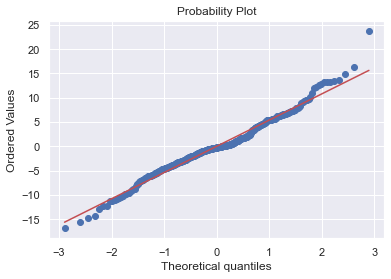

Assumption can be considered as satisfied.


{'Satisfied': ['Autocorrelation', 'Sub-Normality'],
 'Potentially': ['Linearity', 'Multicollinearity', 'Autocorrelation'],
 'Violated': ['Normality']}

In [52]:
tester=Assumptions.Assumption_Tester_OLS(X.drop(columns_to_drop+['const','Distance_miles','LengthOfRestInMinutes'], axis=1), y)
tester.run_all()

In [53]:
OLS(y, X.drop(columns_to_drop+['Distance_miles','LengthOfRestInMinutes','Months_September','Months_May','Months_June',
                              'Months_August','Days_Thursday','Minutes Very Active','Minutes Fairly Active'], axis=1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.913
Model:                             OLS   Adj. R-squared:                  0.912
Method:                  Least Squares   F-statistic:                     945.8
Date:                 Wed, 10 Mar 2021   Prob (F-statistic):          3.73e-190
Time:                         20:29:48   Log-Likelihood:                -1144.5
No. Observations:                  367   AIC:                             2299.
Df Residuals:                      362   BIC:                             2319.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5098      0.900     -1.678      0.094      -3.279       0.259
Distance             0.2126      0.085      2.496      0.013       0.045       0.380
NumberOfAwakings     1.5354      0.043     35.358      0.000       1.450       1.621
Hours Sleep          0.5351      0.183      2.924      0.004       0.175       0.895
Months_July          2.8659      1.055      2.716      0.007       0.791       4.941
==============================================================================
Omnibus:                       15.111   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.684
Skew:                           0.209   Prob(JB):                     5.91e-07
Kurtosis:                       4.304   Cond. No.                         79.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fitting linear regression

R^2: 0.9126693070622582 

Coefficients
-------------------------------------
Intercept: -1.5097587009055502
Distance: 0.21
NumberOfAwakings: 1.54
Hours Sleep: 0.54
Months_July: 2.87

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


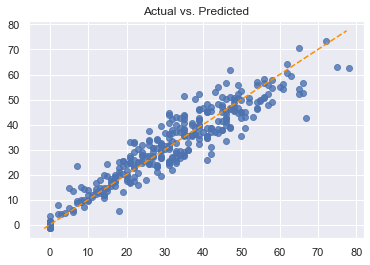

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with MinutesOfBeingAwake


Distance    0.130447
Name: MinutesOfBeingAwake, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with MinutesOfBeingAwake


NumberOfAwakings    0.951817
Hours Sleep         0.779595
Name: MinutesOfBeingAwake, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


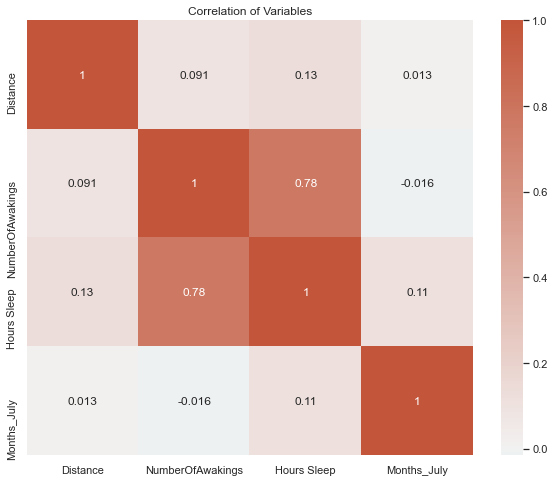

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Hours Sleep: 11.245957156731336
NumberOfAwakings: 8.59912459423673
Distance: 3.4536828846772427
Months_July: 1.1354019607424475

1 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9353668461270181
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


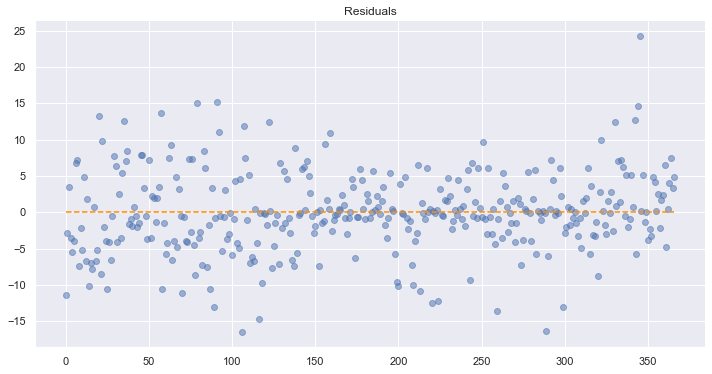

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 115.05287993569793,
 'pvalue for LM': 8.968092545096472e-25,
 'F stats': 41.44142965992157,
 'pvalue for Fstats': 1.2984929063184727e-28}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 8.413219718018575e-07
Residuals are not normally distributed


/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


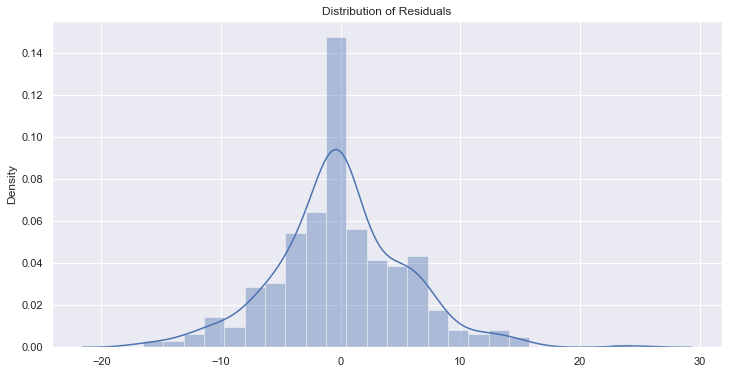


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


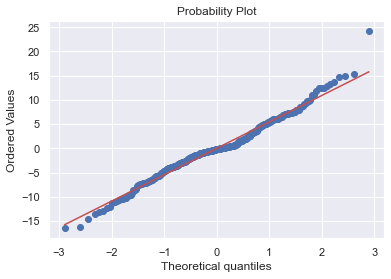

Assumption can be considered as satisfied.


{'Satisfied': ['Autocorrelation', 'Sub-Normality'],
 'Potentially': ['Linearity', 'Multicollinearity', 'Autocorrelation'],
 'Violated': ['Normality']}

In [54]:
tester=Assumptions.Assumption_Tester_OLS(X.drop(columns_to_drop+['const','Distance_miles','LengthOfRestInMinutes','Months_September','Months_May','Months_June',
                              'Months_August','Days_Thursday','Minutes Very Active','Minutes Fairly Active'], axis=1), y)
tester.run_all()